In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns


##### Get WD
 
def find_repo_root(start_path):
    current_path = os.path.abspath(start_path)
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
       
        parent_path = os.path.dirname(current_path)
       
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
       
        current_path = parent_path
 
    return None  # Return None if not found
 
root = find_repo_root(os.getcwd())
root = root.replace('\\', '/')
root



'c:/Users/fitsl/Documents/Programming/UVM Programming Classes/Data Science I/Project'

In [11]:
# Calculate the correlation matrix
df = pd.read_csv(f"{root}/Data/FINAL_FOR_MODEL/From_2000.csv", index_col=0,
                #   usecols=['STATE_FIPS', 'COUNTY_FIPS'], 
                  dtype= {
    'STATE_FIPS': str,
    'COUNTY_FIPS':str
})

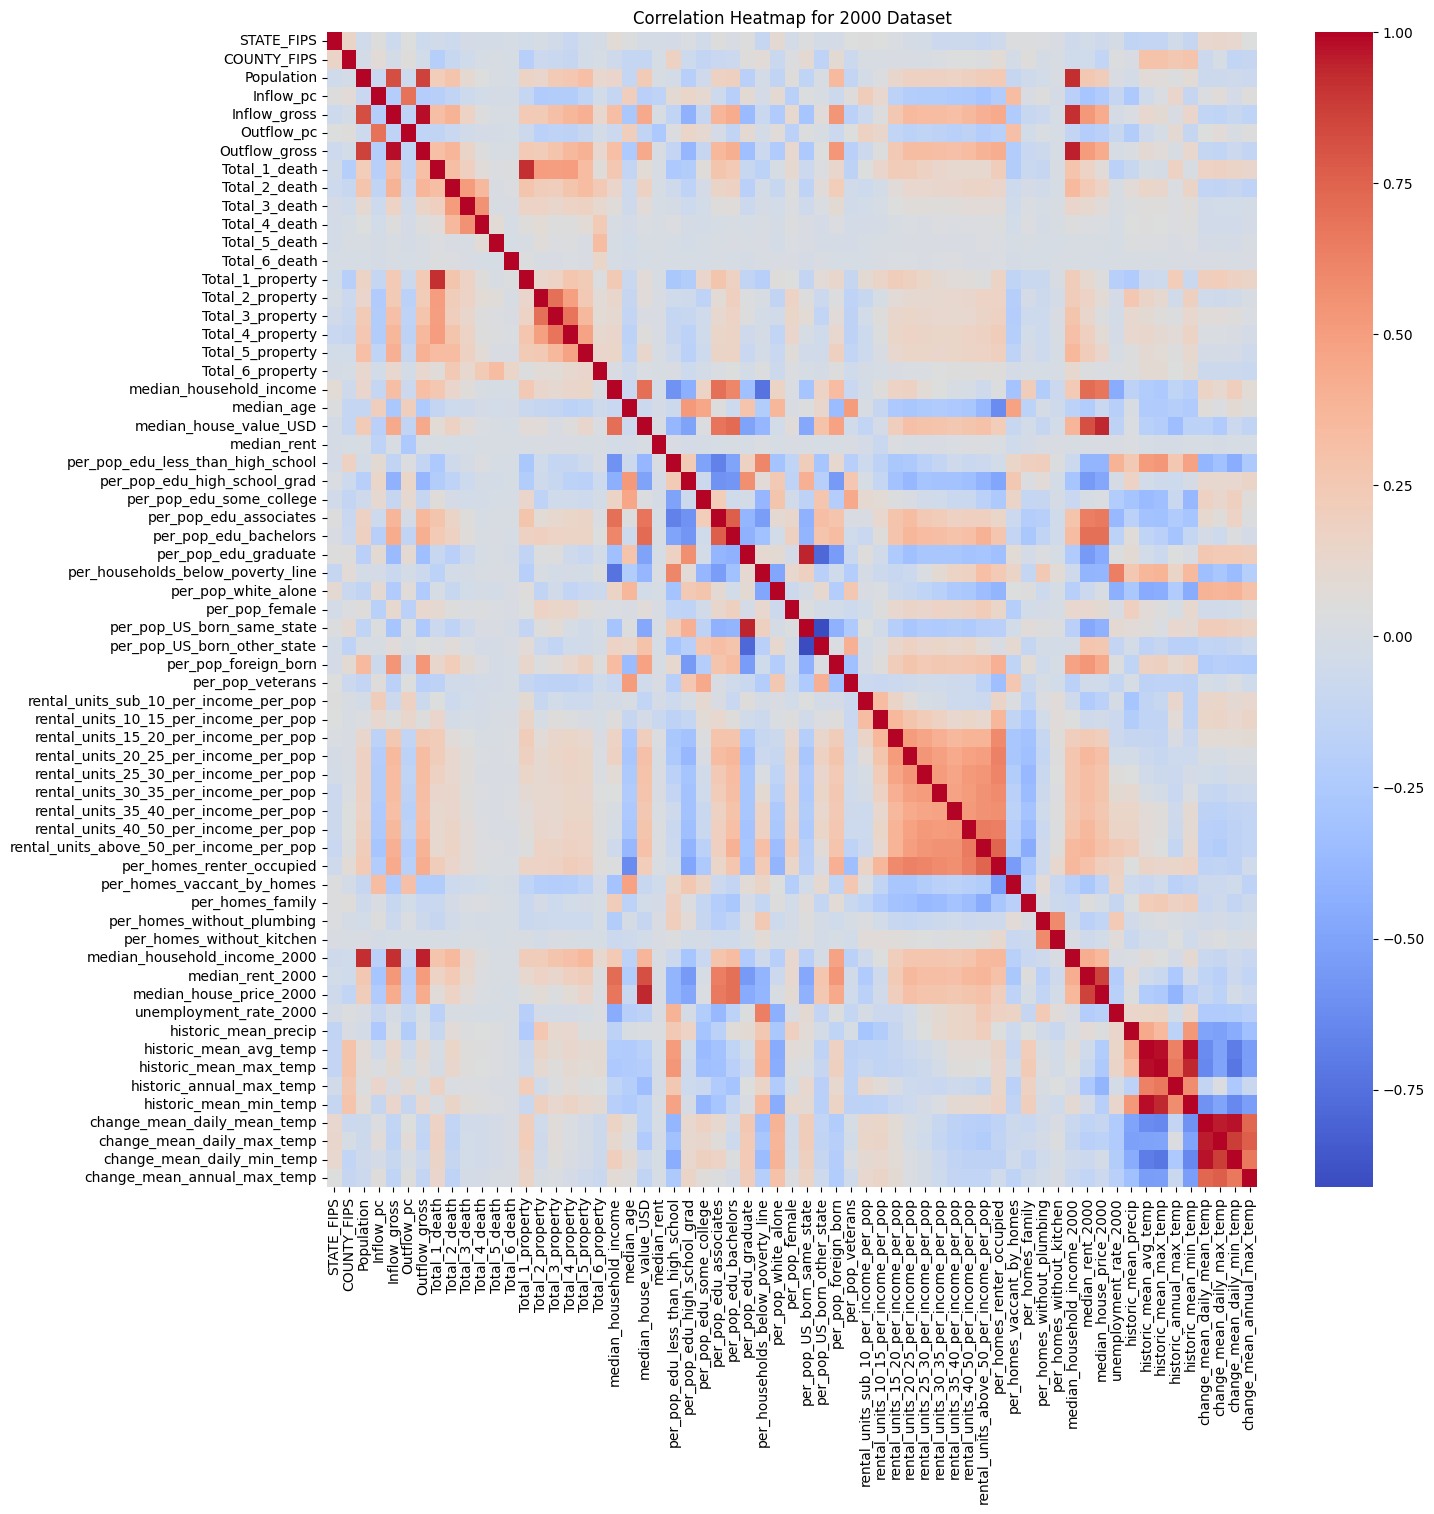

In [12]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for 2000 Dataset')
plt.savefig(f'{root}/Figures/Main/Correlation_Heatmap_for_2000_dataset.png')
plt.show()

In [13]:
# Calculate the correlation matrix
df = pd.read_csv(f"{root}/Data/FINAL_FOR_MODEL/From_2000.csv", index_col=0,
                #   usecols=['STATE_FIPS', 'COUNTY_FIPS'], 
                  dtype= {
    'STATE_FIPS': str,
    'COUNTY_FIPS':str
})
for col in df.columns:
    print(col)

CRMA_drop_cols = [
  "historic_mean_max_temp",
  "historic_annual_max_temp",
  "historic_mean_min_temp",
  "change_mean_daily_max_temp",
  "change_mean_daily_min_temp",
  "change_mean_annual_max_temp",
]

main_drop_cols = ['Population', 'Total_1_death', 'median_house_value_USD', 'median_rent_2000']

response_vars = ['Outflow_pc', 'Inflow_pc', 'Inflow_gross', 'Outflow_gross']

all_drop_cols =CRMA_drop_cols + main_drop_cols + response_vars

df.drop(
    columns=all_drop_cols,
    inplace=True
)


STATE_FIPS
COUNTY_FIPS
Population
Inflow_pc
Inflow_gross
Outflow_pc
Outflow_gross
Total_1_death
Total_2_death
Total_3_death
Total_4_death
Total_5_death
Total_6_death
Total_1_property
Total_2_property
Total_3_property
Total_4_property
Total_5_property
Total_6_property
median_household_income
median_age
median_house_value_USD
median_rent
per_pop_edu_less_than_high_school
per_pop_edu_high_school_grad
per_pop_edu_some_college
per_pop_edu_associates
per_pop_edu_bachelors
per_pop_edu_graduate
per_households_below_poverty_line
per_pop_white_alone
per_pop_female
per_pop_US_born_same_state
per_pop_US_born_other_state
per_pop_foreign_born
per_pop_veterans
rental_units_sub_10_per_income_per_pop
rental_units_10_15_per_income_per_pop
rental_units_15_20_per_income_per_pop
rental_units_20_25_per_income_per_pop
rental_units_25_30_per_income_per_pop
rental_units_30_35_per_income_per_pop
rental_units_35_40_per_income_per_pop
rental_units_40_50_per_income_per_pop
rental_units_above_50_per_income_per_pop


In [14]:
df

,STATE_FIPS,COUNTY_FIPS,Total_2_death,Total_3_death,Total_4_death,Total_5_death,Total_6_death,Total_1_property,Total_2_property,Total_3_property,...,per_homes_vaccant_by_homes,per_homes_family,per_homes_without_plumbing,per_homes_without_kitchen,median_household_income_2000,median_house_price_2000,unemployment_rate_2000,historic_mean_precip,historic_mean_avg_temp,change_mean_daily_mean_temp
0,1,1,0,1,0,0,0,96,83,24,...,0.084162,0.727609,0.004738,0.004180,15972.0,82500.0,0.047527,54.63594,64.332895,2.334211
1,1,3,9,1,0,0,0,167,67,41,...,0.312752,0.722480,0.002354,0.005262,55356.0,105300.0,0.042647,63.79805,67.479746,1.999492
2,1,5,2,0,0,0,0,77,40,13,...,0.184498,0.680755,0.007077,0.004163,10432.0,57200.0,0.056531,52.12515,65.171052,2.235789
3,1,7,2,0,0,0,0,77,42,14,...,0.162521,0.738745,0.001576,0.000000,7383.0,57400.0,0.062199,55.13253,62.920000,2.336136
4,1,9,1,0,0,0,0,105,109,29,...,0.122519,0.746324,0.002853,0.004131,19153.0,76900.0,0.048418,55.77709,60.706818,2.276818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31175,56,37,0,0,0,0,0,69,5,5,...,0.214860,0.695355,0.003035,0.001619,14105.0,92800.0,0.057087,8.97030,41.204415,2.731117
31176,56,39,2,0,0,0,0,47,10,7,...,0.348715,0.575452,0.002311,0.012926,7698.0,344500.0,0.029287,34.59321,31.835892,2.419713
31177,56,41,0,0,0,0,0,19,1,0,...,0.159717,0.699355,0.003208,0.000000,6844.0,83700.0,0.063970,12.31117,39.701944,2.778750
31178,56,43,0,0,0,0,0,57,2,10,...,0.128238,0.651114,0.002073,0.000000,3294.0,81200.0,0.082958,11.98945,43.173678,2.632414


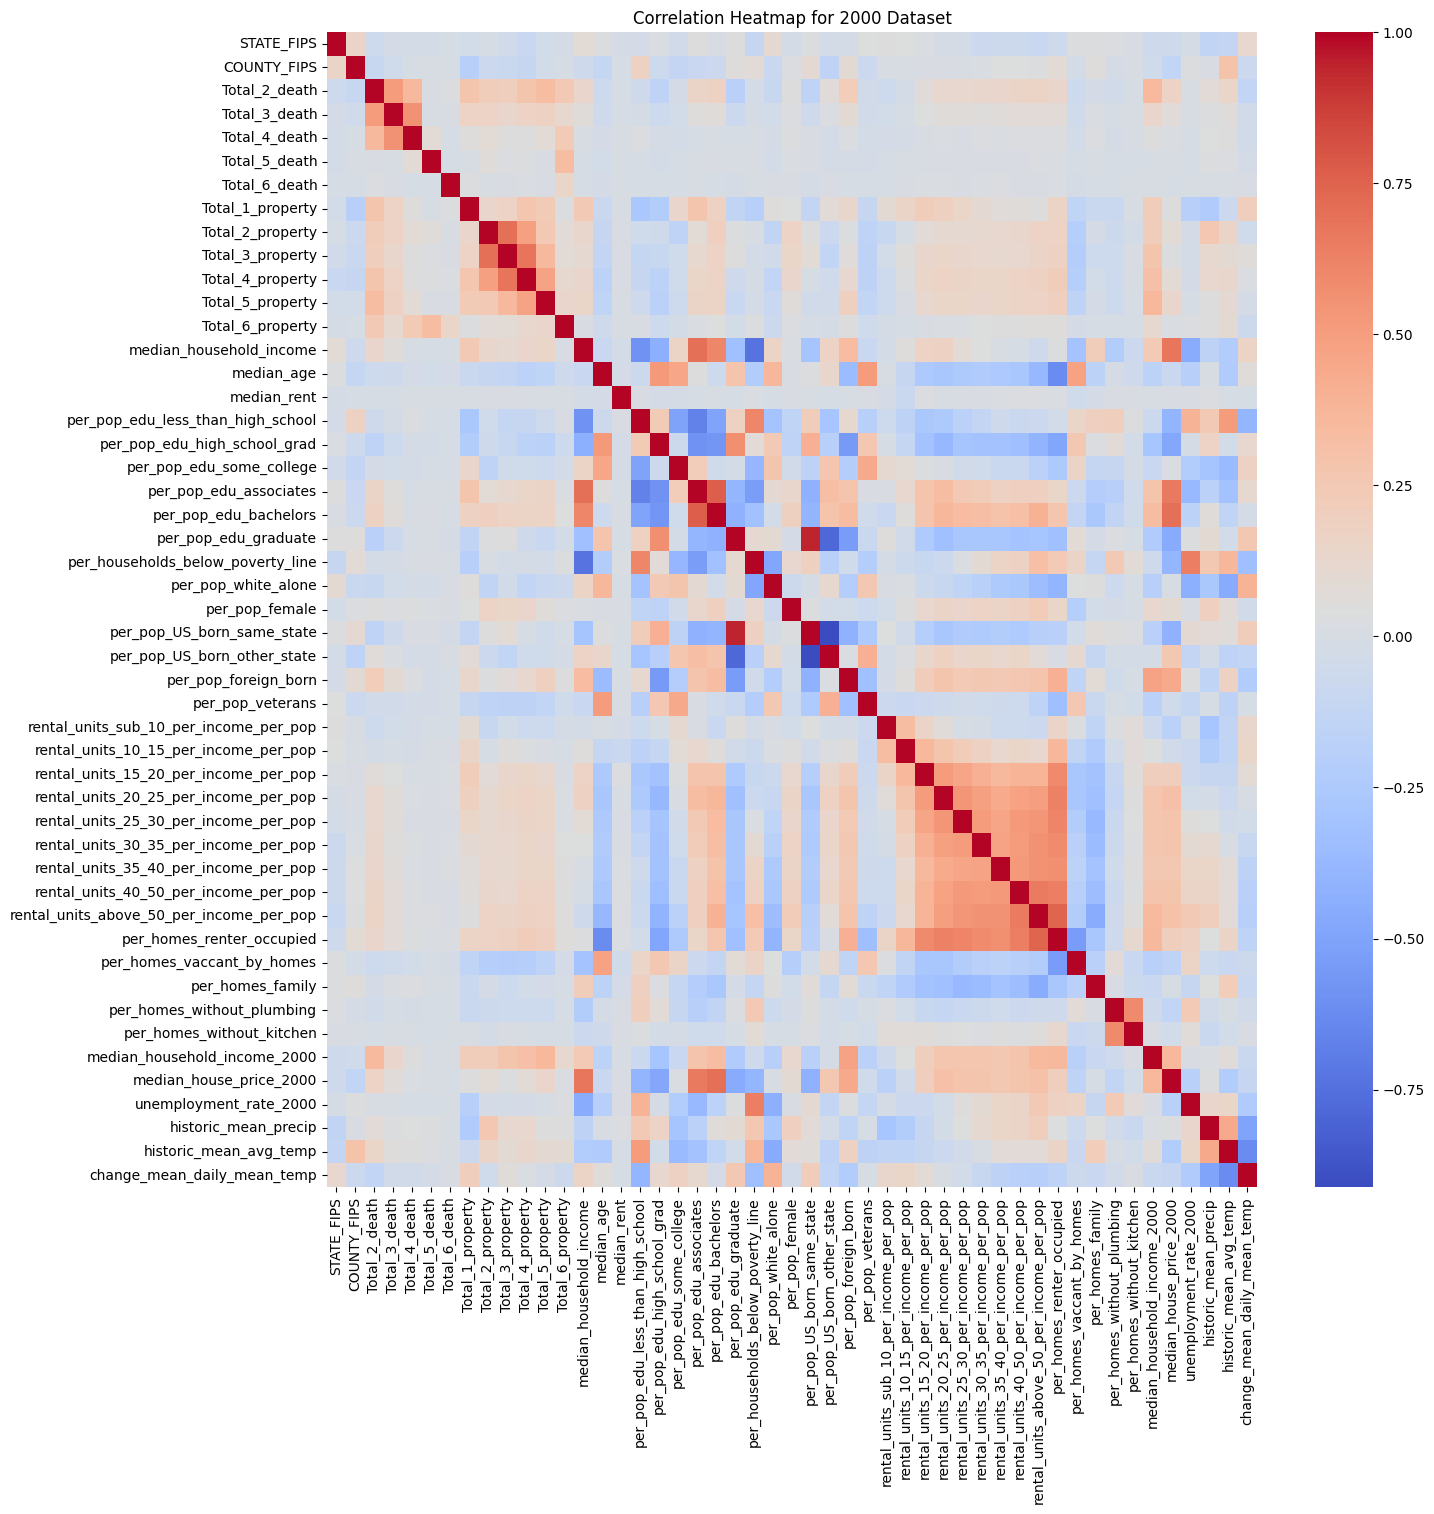

In [15]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for 2000 Dataset')
# plt.savefig(f'{root}/Figures/Main/Correlation_Heatmap_for_2000_dataset.png')
plt.show()

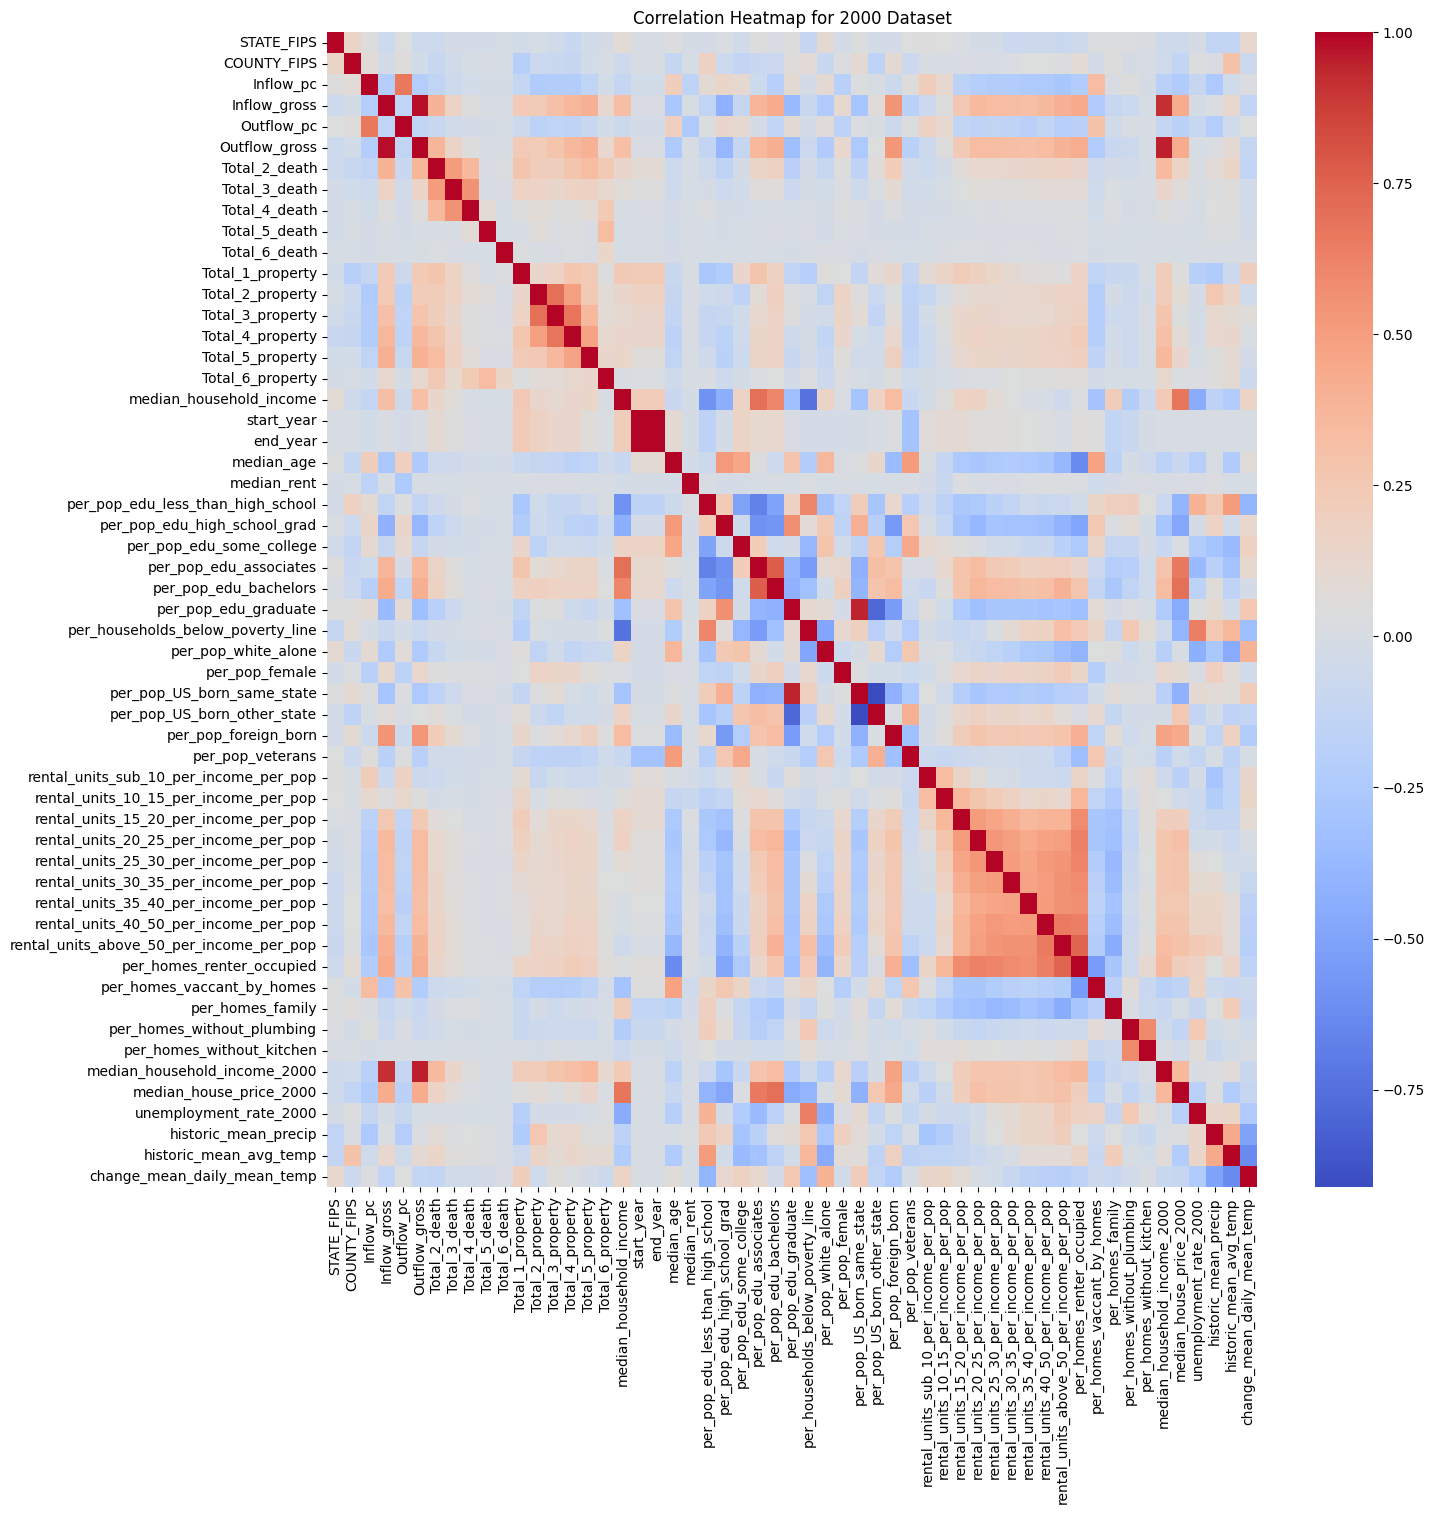

In [16]:
df = pd.read_csv(f"{root}/Data/FINAL_FOR_MODEL/FJK_Sets/From_2000.csv", index_col=0,
                #   usecols=['STATE_FIPS', 'COUNTY_FIPS'], 
                  dtype= {
    'STATE_FIPS': str,
    'COUNTY_FIPS':str
})

correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for 2000 Dataset')
# plt.savefig(f'{root}/Figures/Main/Correlation_Heatmap_for_2000_dataset.png')
plt.show()

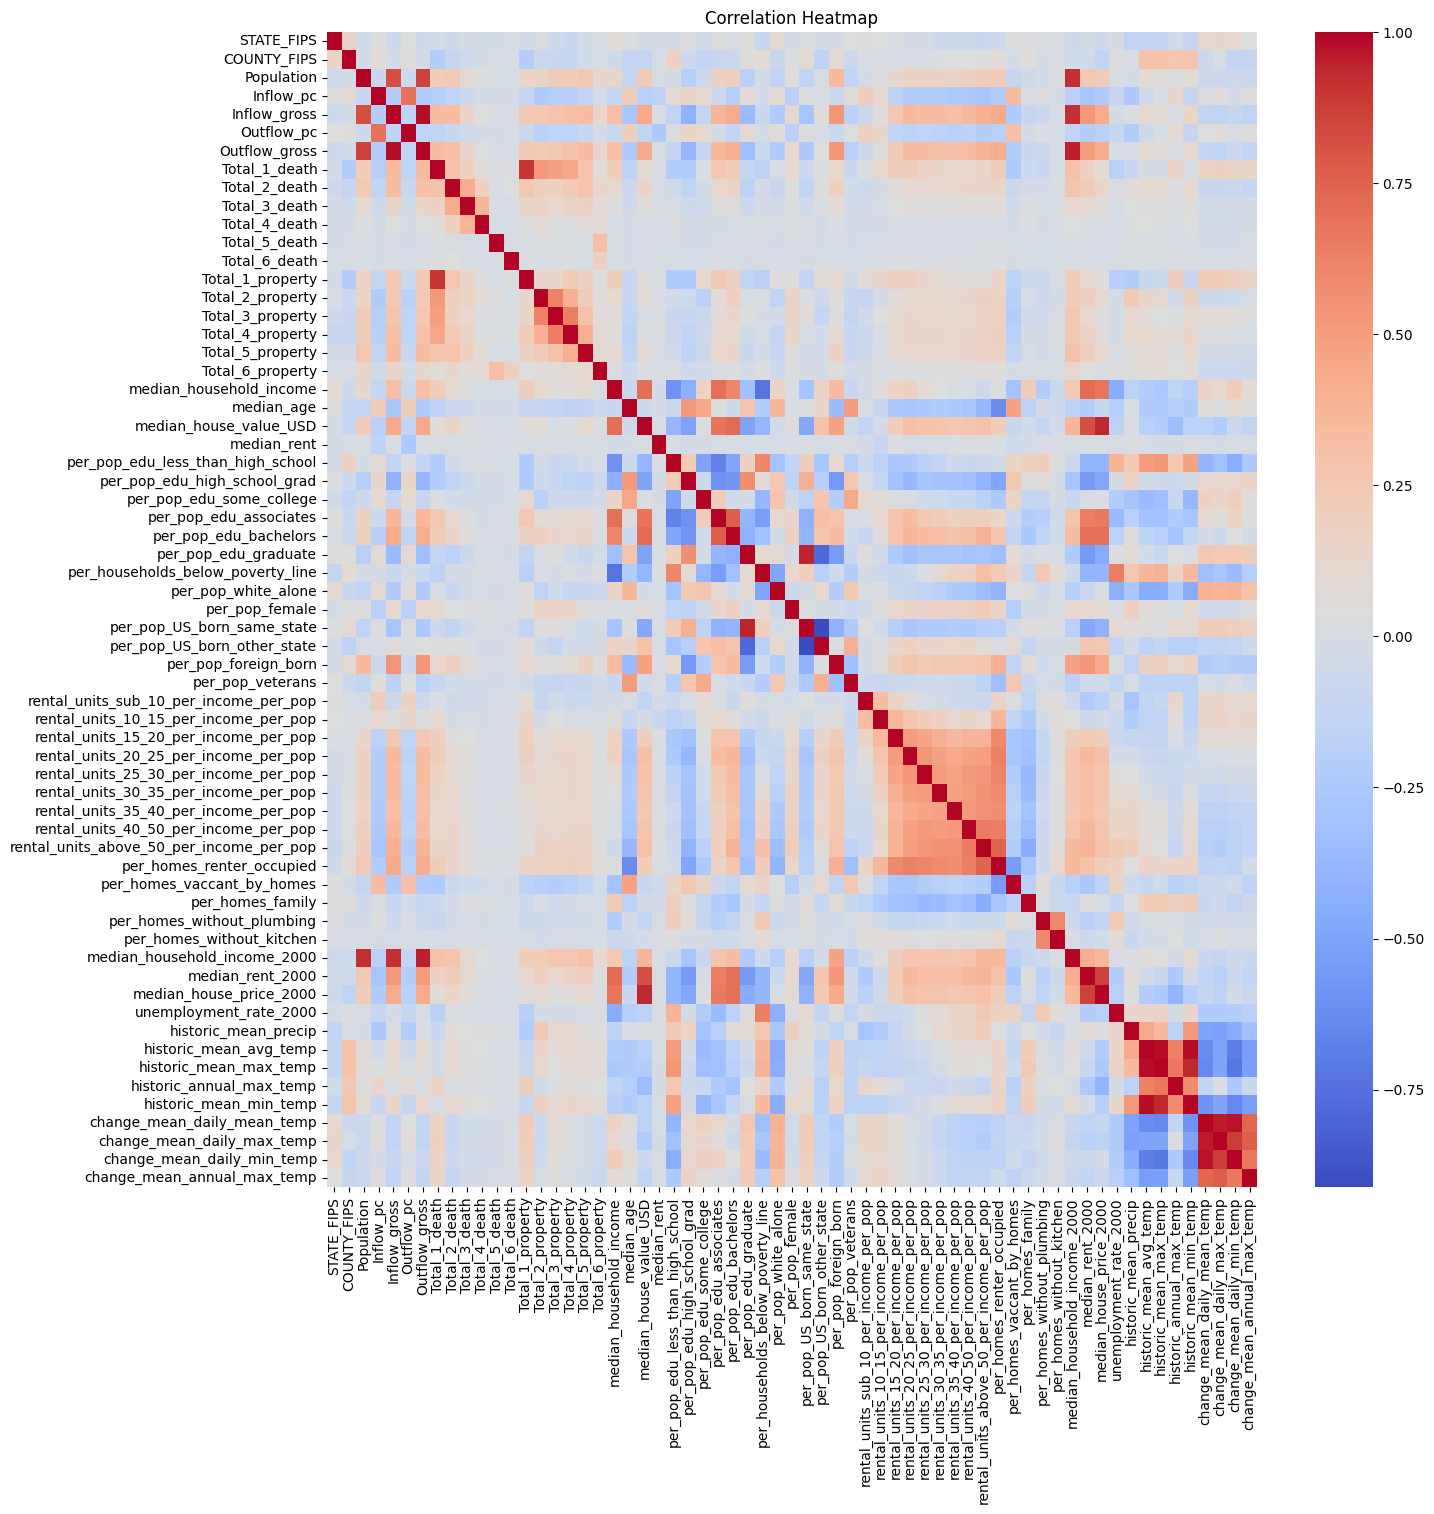

In [17]:
# Calculate the correlation matrix
df = pd.read_csv(f"{root}/Data/FINAL_FOR_MODEL/minus_5_long.csv", index_col=0,
                #   usecols=['STATE_FIPS', 'COUNTY_FIPS'], 
                  dtype= {
    'STATE_FIPS': str,
    'COUNTY_FIPS':str
})
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()